In [1080]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [1081]:
data=pd.read_csv("CarPrice_Assignment.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [1082]:
'''data.enginetype.unique()
engtp=data.groupby('enginetype')
engtp.mean()/1000'''

"data.enginetype.unique()\nengtp=data.groupby('enginetype')\nengtp.mean()/1000"

Text(0.5, 1.0, 'Peak RPM')

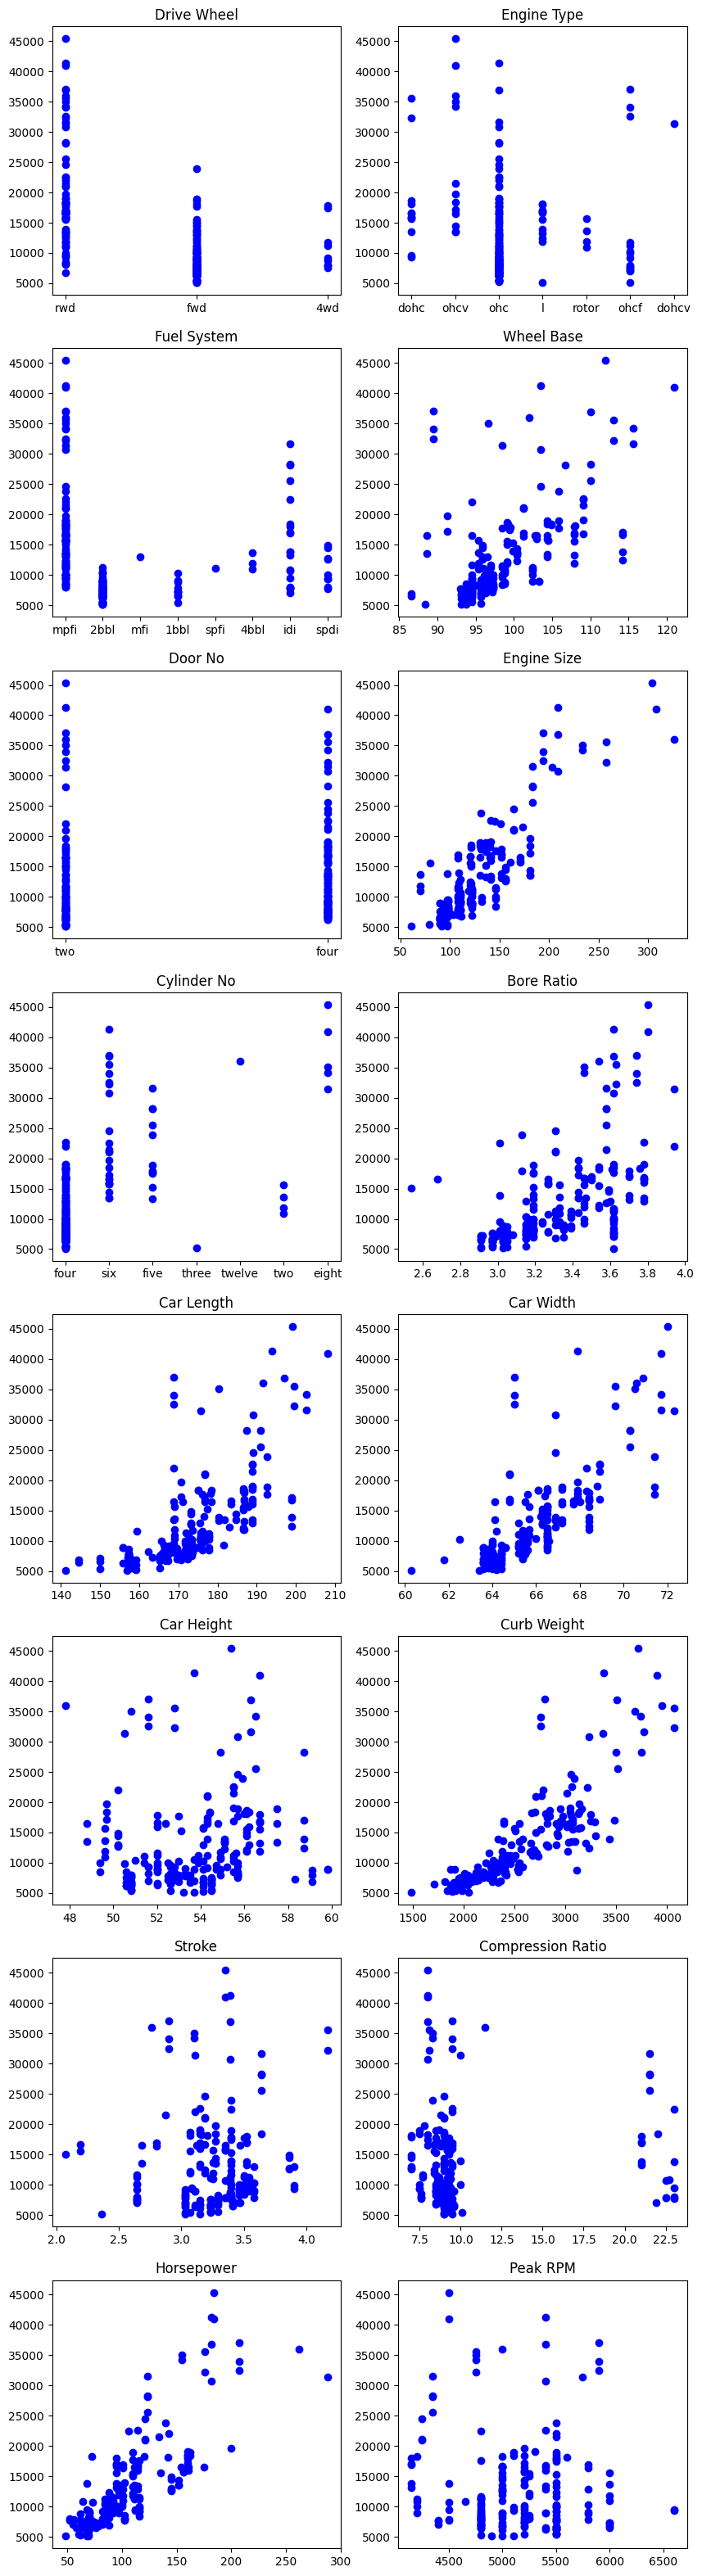

In [1083]:
vs,ax = plt.subplots(8, 2, figsize=(10,40))
ax[0, 0].scatter(data['drivewheel'],data['price'], color='b')
ax[0, 0].set_title('Drive Wheel')
ax[0, 1].scatter(data['enginetype'],data['price'], color='b')
ax[0, 1].set_title('Engine Type')
ax[1, 0].scatter(data['fuelsystem'],data['price'], color='b')
ax[1, 0].set_title('Fuel System')
ax[1, 1].scatter(data['wheelbase'],data['price'], color='b')
ax[1, 1].set_title('Wheel Base')
ax[2, 0].scatter(data['doornumber'],data['price'], color='b')
ax[2, 0].set_title('Door No')
ax[2, 1].scatter(data['enginesize'],data['price'], color='b')
ax[2, 1].set_title('Engine Size')
ax[3, 0].scatter(data['cylindernumber'],data['price'], color='b')
ax[3, 0].set_title('Cylinder No')
ax[3, 1].scatter(data['boreratio'],data['price'], color='b')
ax[3, 1].set_title('Bore Ratio')
ax[4, 0].scatter(data['carlength'],data['price'], color='b')
ax[4, 0].set_title('Car Length')
ax[4, 1].scatter(data['carwidth'],data['price'], color='b')
ax[4, 1].set_title('Car Width')
ax[5, 0].scatter(data['carheight'],data['price'], color='b')
ax[5, 0].set_title('Car Height')
ax[5, 1].scatter(data['curbweight'],data['price'], color='b')
ax[5, 1].set_title('Curb Weight')
ax[6, 0].scatter(data['stroke'],data['price'], color='b')
ax[6, 0].set_title('Stroke')
ax[6, 1].scatter(data['compressionratio'],data['price'], color='b')
ax[6, 1].set_title('Compression Ratio')
ax[7, 0].scatter(data['horsepower'],data['price'], color='b')
ax[7, 0].set_title('Horsepower')
ax[7, 1].scatter(data['peakrpm'],data['price'], color='b')
ax[7, 1].set_title('Peak RPM')

In [1084]:
data=data.drop(columns=['CarName','car_ID'])
#df = df.replace(['old value'], 'new value')
data=data.replace(['gas'],1)
data=data.replace(['diesel'],0)
data=data.replace(['std'],1)
data=data.replace(['turbo'],0)
data=data.replace(['two'],2)
data=data.replace(['four'],4)
data=data.replace(['six'],6)
data=data.replace(['eight'],8)
data=data.replace(['three'],3)
data=data.replace(['five'],5)
data=data.replace(['twelve'],12)
data=data.replace(['4wd'],2)
data=data.replace(['rwd'],3)
data=data.replace(['fwd'],1)
data=data.replace(['1bbl'],1)
data=data.replace(['2bbl'],2)
data=data.replace(['spfi'],4)
data=data.replace(['spdi'],3)
data=data.replace(['4bbl'],5)
data=data.replace(['mfi'],6)
data=data.replace(['idi'],7)
data=data.replace(['mpfi'],8)
data=data.replace(['dohc'],4)
data=data.replace(['dohcv'],6)
data=data.replace(['l'],3)
data=data.replace(['ohc'],1)
data=data.replace(['ohcf'],2)
data=data.replace(['ohcv'],5)
data=data.replace(['rotor'],7)
data=data.replace(['convertible'],4)
data=data.replace(['hardtop'],5)
data=data.replace(['hatchback'],1)
data=data.replace(['sedan'],3)
data=data.replace(['wagon'],2)
data=data.replace(['front','rear'],[1,2])
data.dtypes

symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [1177]:
X = data.drop(columns=['price'])
Y = data['price']

X = X.values
Y = Y.values
Y = Y.reshape(len(Y),1)


(205, 23)

In [1202]:
x0,x1,y0,y1=train_test_split(X,Y,test_size=0.4,random_state=23)
x2,x3,y2,y3=train_test_split(x1,y1,test_size=0.4,random_state=1)
#0 is train set, 1 is temp, 2 is test set, 3 is validation set

In [1203]:
x0=(x0-x0.mean())/(x0.std())
y0=(y0-y0.mean())/(y0.std())
x1=(x1-x1.mean())/(x1.std())
y1=(y1-y1.mean())/(y1.std())
x2=(x2-x2.mean())/(x2.std())
y2=(y2-y2.mean())/(y2.std())
x3=(x3-x3.mean())/(x3.std())
y3=(y3-y3.mean())/(y3.std())

In [1204]:
lr=0.08
cv=0.000001
b=0
prev_cost=0
w=np.zeros(x0.shape[1])

w=w.reshape(-1,1)
n=len(y0)
cost_history=[]


In [1205]:

def CostFunction(y0,y,n):
    cost = np.sum(((y0-y)**2))/(2*n)
    return cost

def CostFunctionReg(y0, y, n, w, rl):
    error=y0-y
    squared_error=error**2
    rg=(rl/(2*n))*np.sum(w**2)
    cost=(np.sum(squared_error)+rg)/(2*n)
    
    return cost

In [1206]:
while True:
        y=x0.dot(w)+b
        #print(f"y: {y[0]}")
        loss=(y-y0)
        #print(f"Loss: {loss[0]}")
        weight_gradient=np.dot(x0.T,loss)/len(y0)
        w=w-(lr*weight_gradient)
        #print(f"Weight1:{w[0]}")
        
        bias_gradient = np.sum(loss)/len(y0)
        b=b-(lr*bias_gradient)
        
        cost=CostFunctionReg(y0,y,n,w,100)
        #cost = CostFunction(y0,y,n)
        #print(f"Cost: {cost}")
        diff=abs(cost-prev_cost)
        cost_history.append(cost)
        
        if diff<cv:
            break
        prev_cost=cost
        if len(cost_history)%10==0:
            y3pred=x3.dot(w)+b
            mse = mean_squared_error(y3, y3pred)
            print(f"Validation MSE: {mse}   Test MSE:{2*CostFunction(y0,y,n)}")
print(f"Final weights:{w}")
print(f"Final b:{b} \n Final Cost:{cost}")
        
    

Validation MSE: 0.8657468491807747   Test MSE:0.8319462964807576
Validation MSE: 0.7816916278422065   Test MSE:0.697167987406587
Validation MSE: 0.7304235897923328   Test MSE:0.6011777452058528
Validation MSE: 0.7005637258206119   Test MSE:0.5324913591171996
Validation MSE: 0.6844647609464128   Test MSE:0.4830516178431801
Validation MSE: 0.6769753388842559   Test MSE:0.447189251885747
Validation MSE: 0.6746503777590726   Test MSE:0.4209129689224153
Validation MSE: 0.6752148655554054   Test MSE:0.4014123477049325
Validation MSE: 0.6771932470615303   Test MSE:0.38670822837062896
Validation MSE: 0.6796525101935104   Test MSE:0.37540664161554266
Validation MSE: 0.6820244697660347   Test MSE:0.36652558876650165
Validation MSE: 0.6839833420534529   Test MSE:0.35937310159641583
Validation MSE: 0.6853618578169299   Test MSE:0.3534614005958036
Validation MSE: 0.6860941598902822   Test MSE:0.3484464651434265
Validation MSE: 0.6861772518477562   Test MSE:0.34408549270327804
Validation MSE: 0.6856

In [1207]:
len(cost_history)

1454

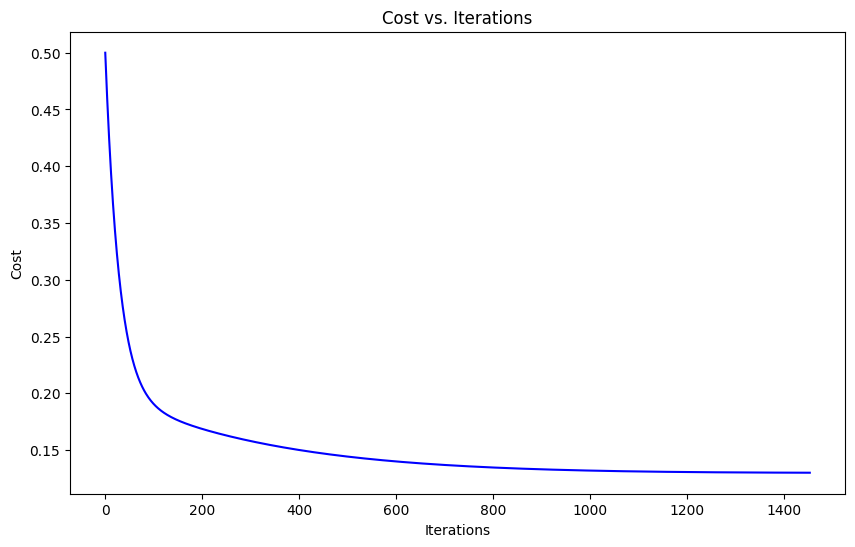

In [1208]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [1209]:
def adjusted_r2_score(y_true,y_pred,samples,features):
    r2=r2_score(y_true, y_pred)
    adjusted_r2=1-(1-r2)*(samples-1)/(samples-features-1)
    return adjusted_r2

In [1210]:
from sklearn.metrics import r2_score
r2=r2_score(y0,y)
print(f"Train Set R2: {r2}")
ar2=adjusted_r2_score(y0,y,len(y0),23)
print(f"Train Set Adjusted R2: {ar2}")
mae = mean_absolute_error(y0, y)
print(f"Mean Absolute Error for Train Set: {mae}")
mse = mean_squared_error(y0, y)
print(f"Train Set MSE: {mse}")


Train Set R2: 0.7674017006264489
Train Set Adjusted R2: 0.7133637118830987
Mean Absolute Error for Train Set: 0.3257939058984825
Train Set MSE: 0.23259829937355117


In [1211]:
y2pred=x2.dot(w)+b
y3pred=x3.dot(w)+b
y1pred=x1.dot(w)+b
r2_test=r2_score(y1,y1pred)

ar2_test=adjusted_r2_score(y1,y1pred,len(y1),23)
print(f"Full Test Set R2: {r2_test}")
print(f"Full Test Set Adjusted R2: {ar2_test}")

Full Test Set R2: 0.6959525694318921
Full Test Set Adjusted R2: 0.575382036620401


In [1212]:
r2_test=r2_score(y3,y3pred)
print(f"Val Set R2: {r2_test}")

mae = mean_absolute_error(y3, y3pred)
print(f"Mean Absolute Error for Validation Set: {mae}")

mse = mean_squared_error(y3, y3pred)
print(f"Validation MSE: {mse}")


Val Set R2: 0.5522350822652372
Mean Absolute Error for Validation Set: 0.47385783540627613
Validation MSE: 0.447764917734763


In [1213]:
r2_test=r2_score(y2,y2pred)
print(f"Test Set R2: {r2_test}")
ar2 = adjusted_r2_score(y2,y2pred,len(y2),23)
print(f"Test Set Adjusted R2: {ar2}")
mae = mean_absolute_error(y2, y2pred)
print(f"Mean Absolute Error for Test Set: {mae}")

mse = mean_squared_error(y2, y2pred)
print(f"Test MSE: {mse}")


Test Set R2: 0.7813359680908986
Test Set Adjusted R2: 0.5801650587345253
Mean Absolute Error for Test Set: 0.35151529391947484
Test MSE: 0.21866403190910136
